In [ ]:
# Added pre-trained models as answered in:
# https://stackoverflow.com/questions/16584552/how-to-state-in-requirements-txt-a-direct-github-source
# !pip install -U spacy
# !python -m spacy download pt_core_news_lg
# !pip install networkx
# !pip install fuzzywuzzy

In [ ]:
import sys
sys.path = ['/root/venv/lib/python3.7/site-packages'] + sys.path
# del sys.modules['decorator']
# !pip install decorator==5.0.7
# import decorator


In [ ]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
from operator import itemgetter
from fuzzywuzzy import process, fuzz
import spacy
import random

%matplotlib inline
from matplotlib.pyplot import figure
import networkx as nx

ModuleNotFoundError: No module named 'fuzzywuzzy'

In [ ]:
nlp = spacy.load("pt_core_news_lg")

In [ ]:
df = pd.read_csv("/work/text-added-10-Dec-2021-17:27.csv")

In [ ]:
df['text'] = df['text'].astype(str)


In [ ]:
corpus = df['text']

In [ ]:
entities = []
sample_size = 100
docs = list(nlp.pipe(random.sample(list(corpus), sample_size), n_process = -1))

for doc in tqdm(docs):
    gpe_lst = []
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            gpe_lst.append(ent.text)
    entities.append(gpe_lst)

100%|██████████| 100/100 [00:00<00:00, 7779.33it/s]


In [ ]:
entities

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [ ]:
articles = []
for entity_list in entities:
    cleaned_entity_list = []
    for entity in entity_list:
        cleaned_entity_list.append(entity.lstrip('the ').replace("'s", "").replace("’s",""))
    articles.append(cleaned_entity_list)

In [ ]:
choices = set([item for sublist in articles for item in sublist])

cleaned_articles = []
for article in articles:
    article_entities = []
    for entity in set(article):
        article_entities.append(process.extractOne(entity, choices)[0])
    cleaned_articles.append(article_entities)

In [ ]:
articles = [article for article in articles if article != []]

In [ ]:
G = nx.Graph()
for entities in articles:
    G.add_nodes_from(entities)

In [ ]:
for entities in articles:
    if len(entities) > 1:
        for i in range(len(entities)-1):
            G.add_edges_from([(str(entities[i]),str(entities[i+1]))])

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

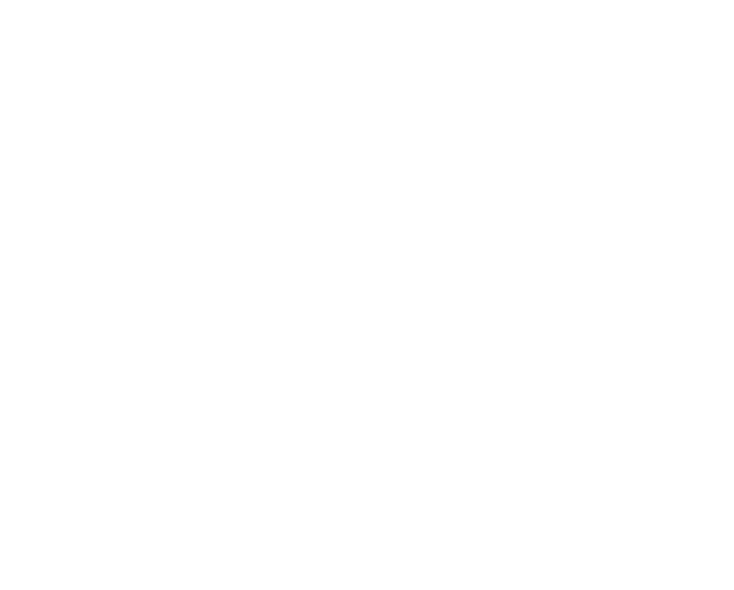

In [ ]:
figure(figsize=(10, 8))
nx.draw_shell(G, node_size=15)\


In [ ]:
from pprint import pprint

pprint([(X.text, X.label_) for X in docs[0].ents])

print(docs[0].text)
for token in docs[0]:
    print(token.text, token.pos_, token.dep_, type(token))

[('Promovendo a Inovação para o Desenvolvimento da Aviação Global', 'MISC')]
Mais de 65,5 milhões de pessoas trabalham no setor com foco em proteção de passageiros, tripulações e transporte de vacinas; tema é "Promovendo a Inovação para o Desenvolvimento da Aviação Global".

Clique aqui para ler a notícia completa
Mais ADV advmod <class 'spacy.tokens.token.Token'>
de ADP fixed <class 'spacy.tokens.token.Token'>
65,5 NUM nsubj <class 'spacy.tokens.token.Token'>
milhões NUM flat <class 'spacy.tokens.token.Token'>
de ADP case <class 'spacy.tokens.token.Token'>
pessoas NOUN nmod <class 'spacy.tokens.token.Token'>
trabalham VERB ROOT <class 'spacy.tokens.token.Token'>
no ADP case <class 'spacy.tokens.token.Token'>
setor NOUN obl <class 'spacy.tokens.token.Token'>
com ADP case <class 'spacy.tokens.token.Token'>
foco NOUN obl <class 'spacy.tokens.token.Token'>
em ADP case <class 'spacy.tokens.token.Token'>
proteção NOUN nmod <class 'spacy.tokens.token.Token'>
de ADP case <class 'spacy.tokens.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2392c230-4672-47ef-bbd2-e97d3feaff76' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>